In [ ]:
#分词处理
import jieba
print('主程序执行开始...')

input_file_name = 'wiki.txt'
output_file_name = 'wiki_separate_new.txt'
#input_file = open(input_file_name, 'r', encoding='utf-8', errors="ignore")
#input_file = open(input_file_name, 'r', encoding='utf-8')
#output_file = open(output_file_name, 'w', encoding='utf-8')
input_file = open(output_file_name, 'r', encoding='utf-8', errors="ignore") 

print('开始读入数据文件...')  
lines = input_file.readlines()
print('读入数据文件结束！')

print('分词程序执行开始...')
count = 1

for line in lines[1135:]:
    #print(line)
    # jieba分词的结果是一个list，需要拼接，但是jieba把空格回车都当成一个字符处理
    
    output_file.write(' '.join(jieba.cut(line.split('\n')[0].replace(' ', ''))) + '\n')
    count += 1
    if count % 10000 == 0:
        print('目前已分词%d条数据' % count)
     
   
print('分词程序执行结束！')
print('主程序执行结束！')


In [ ]:
#去掉标点符号之类的

import re

print('主程序执行开始...')

input_file_name = 'wiki_separate_new.txt'  
output_file_name = 'wiki_separate_remove.txt'
input_file = open(input_file_name, 'r', encoding='utf-8')
#input_file = open(input_file_name, 'r', encoding='gbk')
output_file = open(output_file_name, 'w', encoding='utf-8')

print('开始读入数据文件...')
lines = input_file.readlines()
print('读入数据文件结束！')

print('分词程序执行开始...')
count = 1
cn_reg = '^[\u4e00-\u9fa5]+$'

for line in lines:
    line_list = line.split('\n')[0].split(' ')
    line_list_new = []
    for word in line_list:
        if re.search(cn_reg, word):
            line_list_new.append(word)
    print(line_list_new)
    output_file.write(' '.join(line_list_new) + '\n')
    count += 1
    if count % 10000 == 0:
        print('目前已分词%d条数据' % count)
print('分词程序执行结束！')

print('主程序执行结束！')

In [2]:
'\u4e00'

'一'

In [ ]:
# opencc 转换繁体字

In [2]:
from gensim.models import Word2Vec 


In [1]:
!pip install gensim



Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/
    100% |████████████████████████████████| 24.2MB 356kB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 36.7MB/s ta 0:00:01
    100% |████████████████████████████████| 1.4MB 20.4MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 29.8MB/s ta 0:00:01
    100% |████████████████████████████████| 5.6MB 4.6MB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 29.5MB/s ta 0:00:01
    100% |████████████████████████████████| 552kB 33.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for smart-open ... done
  Stored in directory: /home/aistudio/.cache/pip/wheels/fe/2b/6f/352372bc877d0df4d5cf4962b8bfabded57b003acfea25fa09
Successfully built smart-open


In [5]:
# 将文本转为 sentence类型
sentence=word2vec.LineSentence('/home/aistudio/data/data10502/wiki_final.txt')

In [3]:
from gensim.models import word2vec  

In [6]:
%%time

sentence

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.91 µs


In [7]:
#训练半个小时
%%time 
model = Word2Vec(sentence, size=200, window=5, min_count=5, workers=4)

CPU times: user 1h 25min 19s, sys: 39.8 s, total: 1h 25min 59s
Wall time: 30min 5s


In [8]:
model.save("word2vec_final.model")

In [6]:
model.wv['数学']

array([ 0.82915163, -1.5761962 , -2.0205092 ,  1.2866601 ,  0.29717436,
        1.3328071 , -2.5702708 , -0.1610706 ,  0.73208255, -0.06811322,
       -0.6025819 , -0.3711156 , -0.8706292 ,  0.35088748,  1.3858255 ,
        2.1268117 , -1.0851719 ,  0.9832088 ,  0.92378086, -2.0275881 ,
       -1.4257358 ,  1.5018803 , -0.55153084, -0.10218675, -0.7303771 ,
       -2.035997  , -1.5197991 , -0.811299  , -0.23986307, -0.37491402,
        1.5901533 ,  0.6034626 ,  1.1089395 , -0.15557145, -1.8726454 ,
       -1.1457927 ,  1.97081   , -0.70589495,  0.93161434, -0.541487  ,
       -2.1555758 , -0.10670734,  0.33455846, -1.1973968 ,  2.0645285 ,
       -1.1935514 ,  0.47852913,  2.1880007 ,  1.997919  , -1.2811989 ,
       -1.4890558 ,  1.9128842 ,  0.6014924 ,  0.3671793 ,  1.1904514 ,
       -2.50762   , -0.8408596 , -3.3594294 , -0.98957914, -0.8736188 ,
        0.68906224,  0.01181333,  0.20253518,  0.96189386, -0.08212715,
        0.4314675 ,  1.5336426 , -0.10434972, -1.1437386 , -1.19

In [4]:
model = Word2Vec.load("word2vec_final.model")

In [7]:
model.most_similar('美丽')

/opt/conda/envs/python35-paddle120-env/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('迷人', 0.7782797813415527),
 ('可爱', 0.7375848293304443),
 ('诱人', 0.7066563367843628),
 ('漂亮', 0.7062100768089294),
 ('甜美', 0.6972771286964417),
 ('优雅', 0.6940381526947021),
 ('美好', 0.6671380400657654),
 ('灿烂', 0.6568256616592407),
 ('温柔', 0.65470951795578),
 ('美妙', 0.6513704657554626)]

In [8]:
model.wv.distance('凉爽', '炎热')


0.14520865678787231

In [12]:
model.wv.distance('凉爽', '酷热')

0.2516061067581177

In [13]:
model.wv.most_similar(positive=['女儿', '爸爸'], negative=['妈妈'])

[('儿子', 0.8078967332839966),
 ('大儿子', 0.734472393989563),
 ('小儿子', 0.7303576469421387),
 ('妹妹', 0.7197036743164062),
 ('弟弟', 0.712992250919342),
 ('哥哥', 0.7056338787078857),
 ('姐姐', 0.7037845849990845),
 ('妻子', 0.6865792274475098),
 ('舅舅', 0.6747943162918091),
 ('养女', 0.6718052625656128)]

In [14]:
def tsne_plot(model):
    labels = []
    tokens = []
    
    words = ['数学', '酷热', '爸妈', '美丽', '大小', '陶渊明']
    for word in words:
        labels.append(word)
        tokens.append(model[word])
        for sim, _ in model.wv.most_similar(word, topn=50):
            labels.append(sim)
            tokens.append(model[sim])
        
    tsne = TSNE(perplexity=40, init='pca', n_iter=3500, random_state=42)
    new_vectors = tsne.fit_transform(tokens)
    
    x, y = [], []
    for v1, v2 in new_vectors:
        x.append(v1)
        y.append(v2)
        
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(3, 2), textcoords='offset points', ha='center', va='bottom')
        
    plt.show()

/opt/conda/envs/python35-paddle120-env/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/opt/conda/envs/python35-paddle120-env/lib/python3.5/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/envs/python35-paddle120-env/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


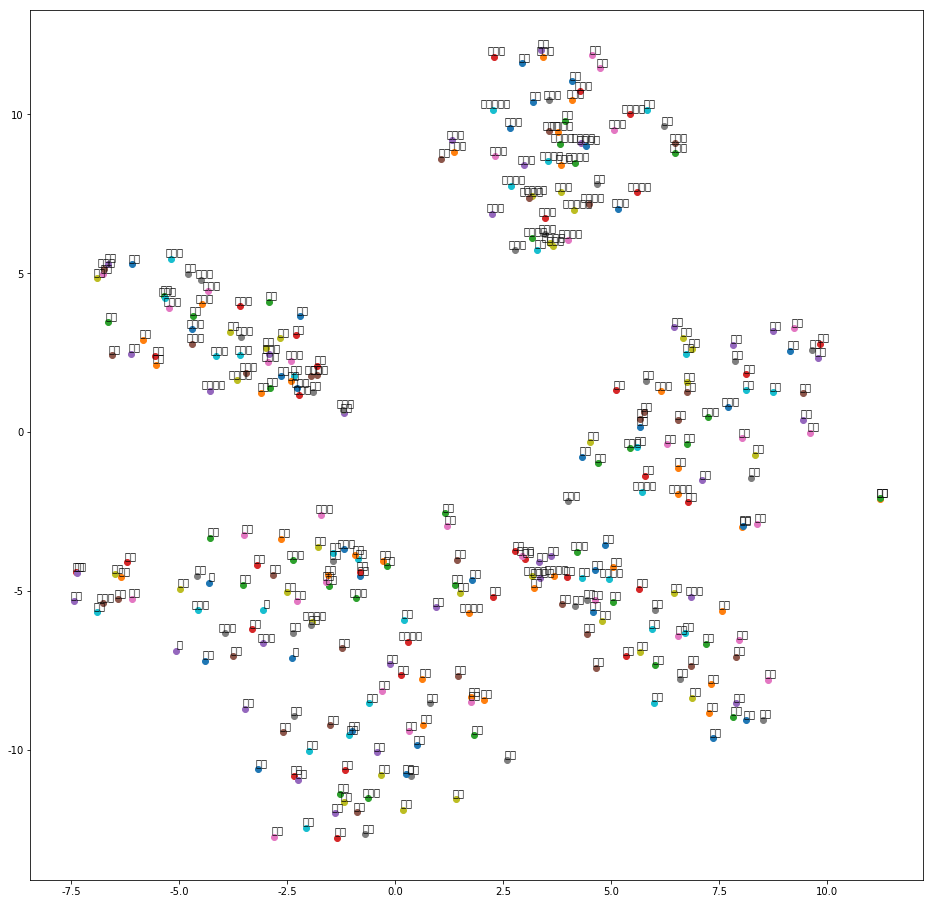

In [17]:
tsne_plot(model)

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [11]:
model.wv.distance('嫉妒', '羡慕')

0.25693386793136597